# Smart_Loan_Recovery_Management_System

# 1.Importing Libraries

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [317]:
import joblib

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [318]:
# Reading CSV File
Loan_Data = pd.read_csv('Smart_Loan_Recovery_System.csv')

## Preparing the Dataset

In [319]:
Loan_Data.head()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1727997.258,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1180032.362,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2622539.931,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1145492.680,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No


In [320]:
# Show first 5 rows
Loan_Data.shape

(500, 21)

In [321]:
# Dataset info
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

In [322]:
# Summary statistics (numerical columns)
Loan_Data.describe

<bound method NDFrame.describe of     Borrower_ID  Age  Gender Employment_Type  Monthly_Income  Num_Dependents  \
0         BRW_1   59    Male        Salaried          215422               0   
1         BRW_2   49  Female        Salaried           60893               0   
2         BRW_3   35    Male        Salaried          116520               1   
3         BRW_4   63  Female        Salaried          140818               2   
4         BRW_5   28    Male        Salaried           76272               1   
..          ...  ...     ...             ...             ...             ...   
495     BRW_496   46  Female        Salaried          248483               1   
496     BRW_497   30  Female        Salaried          243590               3   
497     BRW_498   46  Female        Salaried          113864               2   
498     BRW_499   54    Male        Salaried          158401               2   
499     BRW_500   61    Male   Self-Employed           40169               1   

    L

## check the missing values

In [323]:
#check the missing values
Loan_Data.isnull()

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### **Conclusion:**
The results indicate that all 21 features contain zero missing values across all 500 records. This confirms that the dataset is complete, consistent, and does not require any imputation or removal of records due to null entries.

In [324]:
Loan_Data.isnull().sum()

Borrower_ID                0
Age                        0
Gender                     0
Employment_Type            0
Monthly_Income             0
Num_Dependents             0
Loan_ID                    0
Loan_Amount                0
Loan_Tenure                0
Interest_Rate              0
Loan_Type                  0
Collateral_Value           0
Outstanding_Loan_Amount    0
Monthly_EMI                0
Payment_History            0
Num_Missed_Payments        0
Days_Past_Due              0
Recovery_Status            0
Collection_Attempts        0
Collection_Method          0
Legal_Action_Taken         0
dtype: int64

### **Conclusion:**
The result of Loan_Data.isnull().sum() shows 0 null values across all 21 columns. This indicates that the dataset is complete and contains no missing entries, so no imputation or data cleaning for null values is required.

## Creating backup copy()

In [325]:
Backup = Loan_Data.copy()

## Exploratory Data Analysis

In [326]:
# Count of borrowers by Gender
Loan_Data["Gender"].value_counts()

Gender
Male      311
Female    189
Name: count, dtype: int64

In [327]:
# Loan Type distribution
Loan_Data["Loan_Type"].value_counts()

Loan_Type
Personal    220
Home        144
Auto         87
Business     49
Name: count, dtype: int64

In [328]:
# Average Loan Amount by Employment Type
Loan_Data.groupby("Employment_Type")["Loan_Amount"].mean()

Employment_Type
Business Owner    1.011490e+06
Salaried          1.023313e+06
Self-Employed     1.032498e+06
Name: Loan_Amount, dtype: float64

In [329]:
Loan_Data["Collection_Method"].unique()

array(['Settlement Offer', 'Legal Notice', 'Calls', 'Debt Collectors'],
      dtype=object)

In [330]:
# Select only numeric columns for correlation
numeric_data = Loan_Data.select_dtypes(include=['number'])

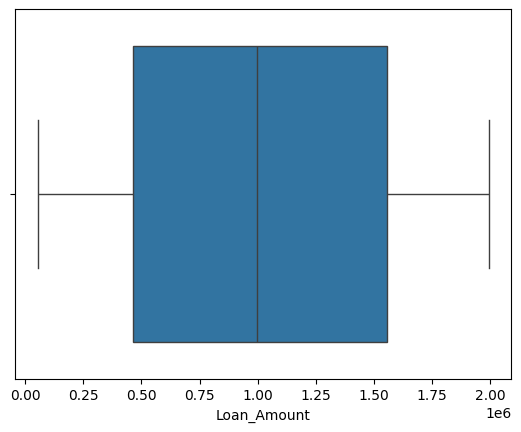

In [331]:
sns.boxplot(x=Loan_Data['Loan_Amount'])
plt.show()


Observations:

The boxplot shows no extreme outliers, because:

There are no individual points beyond the whiskers.

The data is fairly evenly distributed between 0 and around 2,000,000.

The median (middle line in the box) is slightly below the center, meaning:

More people tend to have slightly higher loan amounts compared to lower amounts.

The whiskers represent the minimum and maximum values within the normal range.

Since no dots are outside, there are no detected outliers in this visualization.

## Categoriacal plots

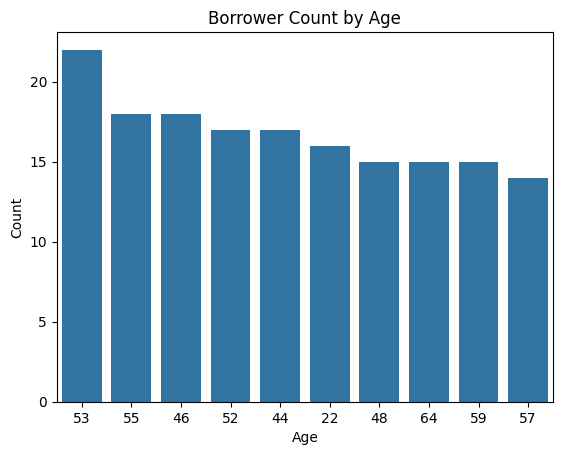

In [332]:
# Calculate counts per age
Age_counts = Loan_Data['Age'].value_counts()

# Get top 10 ages by borrower count
Top_10Borrower_ages = Age_counts.head(10).index.tolist()

# Filter Loan_Data to include only rows with those top 10 ages
top_10_data = Loan_Data[Loan_Data['Age'].isin(Top_10Borrower_ages)]

sns.countplot(x="Age", data=top_10_data, order=Top_10Borrower_ages)
plt.title("Borrower Count by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Distribution for Borrower Count by Age Chart

The highest borrower count is at age 53, indicating this age group has the most active borrowers.

Ages 55 and 46 also have a relatively high number of borrowers, showing a concentration in the mid-40s to mid-50s range.

Borrower counts gradually decrease for other ages, suggesting less borrowing activity among younger and older age groups.

This trend highlights that middle-aged individuals are the primary target audience for loans, likely due to stable employment and higher financial responsibilities.

# Distribution of Borrower Count by Employment Type

* **Salaried borrowers** are the highest group, ranging between 250–300, showing they are the main segment taking loans.
* **Self-employed borrowers** are moderate, with counts between 0–150, indicating a smaller but significant share.
* **Business owners** have the lowest count, ranging from 0–50, showing minimal loan participation.
Overall, salaried individuals dominate the dataset, likely due to stable income and higher eligibility for loans.

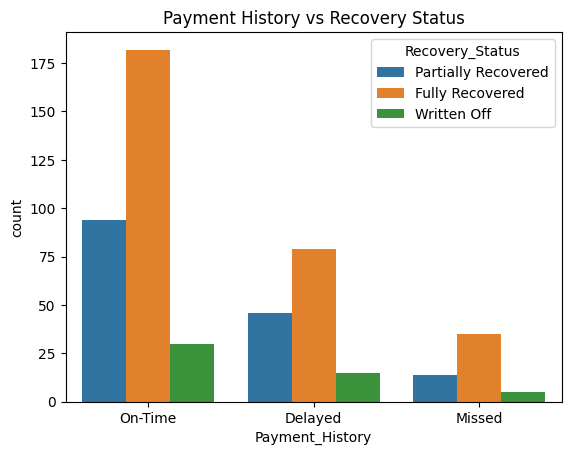

In [333]:
sns.countplot(x='Payment_History', hue='Recovery_Status', data=Loan_Data)
plt.title("Payment History vs Recovery Status")
plt.show()


### **Conclusion for Payment History vs Recovery Status**

1. **On-Time Payments:**

   * Highest count of **Fully Recovered** loans.
   * Indicates that consistent on-time payments strongly correlate with full recovery.

2. **Delayed Payments:**

   * Significant number of **Partially Recovered** and **Written Off** loans.
   * Suggests delays increase the risk of incomplete recovery.

3. **Missed Payments:**

   * Lowest count overall but majority are either **Partially Recovered** or **Written Off**.
   * Missed payments are a strong indicator of potential loan default.

🔹 **Key Insight:**
Improving on-time payments through reminders or flexible payment options could significantly reduce defaults and increase full loan recovery.


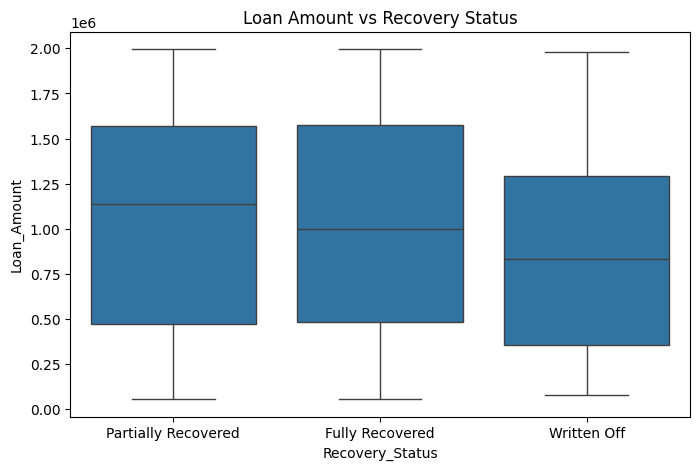

In [334]:
# Distribution Analysis
plt.figure(figsize=(8,5))
sns.boxplot(x='Recovery_Status', y='Loan_Amount', data=Loan_Data)
plt.title('Loan Amount vs Recovery Status')
plt.show()


### **Conclusion for Loan Amount by Recovery Status (Boxplot)**

1. **Fully Recovered Loans:**

   * Median loan amount is around **1M**.
   * Wide range, indicating both small and large loans can be fully recovered.

2. **Partially Recovered Loans:**

   * Median slightly higher than fully recovered.
   * More variability, showing inconsistent recovery for mid-to-high loan amounts.

3. **Written Off Loans:**

   * Median is lower (\~0.8M), but there are extreme outliers at high amounts.
   * Suggests lower-value loans are more likely to be written off, but even large loans can fail.

🔹 **Key Insight:**
Higher loan amounts tend to have better recovery rates, while smaller loans show a higher risk of being written off. Proper risk assessment is crucial before approving smaller loans.


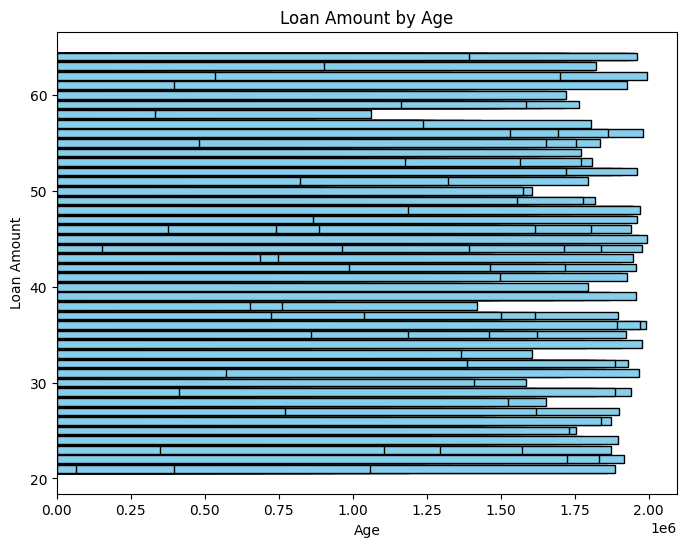

In [335]:
# Bar plot
plt.figure(figsize=(8,6))
plt.barh(Loan_Data["Age"], Loan_Data["Loan_Amount"], color="skyblue", edgecolor="black")
plt.xlabel("Age")
plt.ylabel("Loan Amount")
plt.title("Loan Amount by Age")
plt.show()

### **Conclusion for Loan Amount by Age (Bar Chart)**

1. **Peak Loan Amounts:**

   * Ages **45–55** show the highest loan amounts, indicating strong borrowing activity in mid-age groups.

2. **Moderate Borrowing:**

   * Ages **30–44** have moderate loan amounts, suggesting early career borrowers.

3. **Low Loan Amounts:**

   * Younger (<30) and older (>55) age groups take smaller loans.

4. **Key Insight:**

   * Mid-aged individuals are the primary loan seekers, likely due to **stable income** and **higher financial commitments**.


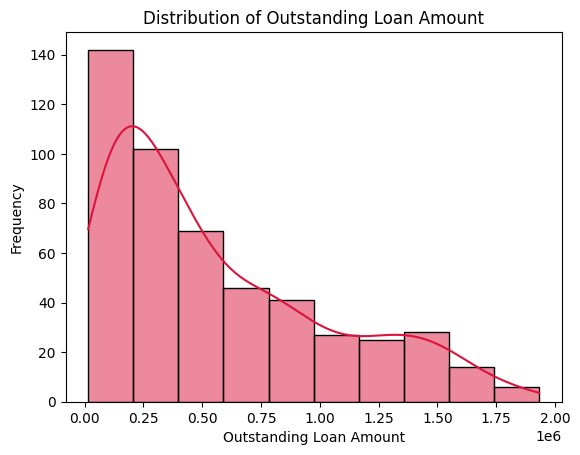

In [336]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(Loan_Data["Outstanding_Loan_Amount"], bins=10, kde=True, color="crimson")
plt.title("Distribution of Outstanding Loan Amount")
plt.xlabel("Outstanding Loan Amount")
plt.ylabel("Frequency")
plt.show()


### **Conclusion for Distribution of Outstanding Loan Amount**

* Most **outstanding loan amounts** are **low**, concentrated between **0 and 0.25M**.
* The frequency decreases sharply as the loan amount increases, showing a **right-skewed distribution**.
* Very **few borrowers** have loans above **1.25M**, indicating **high-value loans are rare**.
* This suggests most borrowers take **small to medium-sized loans**, likely for manageable repayment.


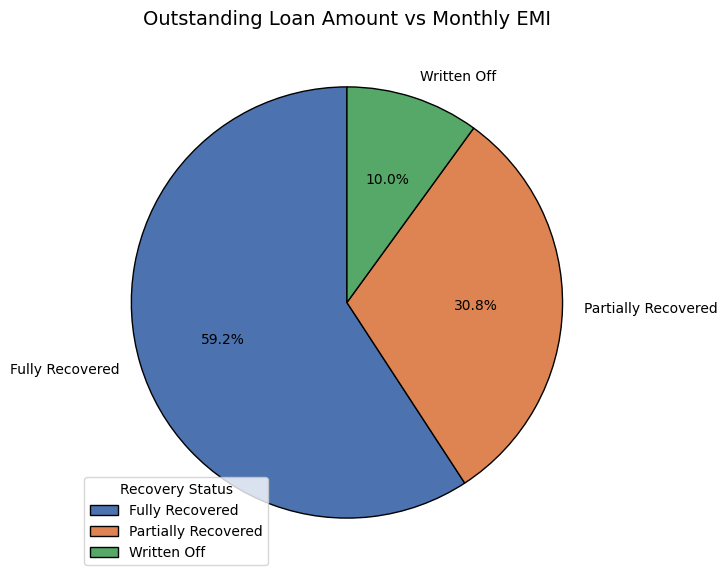

In [337]:
# Pie chart for Loan Recovery Status
colors = sns.color_palette("deep", n_colors=len(Loan_Data["Recovery_Status"].value_counts()))
plt.figure(figsize=(7,7))
plt.pie(
    Loan_Data["Recovery_Status"].value_counts(),
    labels=Loan_Data["Recovery_Status"].value_counts().index,
    colors=colors,
    autopct='%1.1f%%',         # Fix autopct format
    startangle=90,              # Start pie chart at 90 degrees
    wedgeprops={'edgecolor': 'black'}
)
plt.title("Outstanding Loan Amount vs Monthly EMI", fontsize=14)
plt.legend(title="Recovery Status", loc="best")
plt.show()


### **Conclusion for Loan Recovery Status Pie Chart**

* **Fully Recovered:** 59.2% of loans are fully recovered, indicating a strong repayment trend.
* **Partially Recovered:** 30.8% are partially recovered, suggesting some repayment challenges.
* **Written Off:** 10% are written off, representing default cases.

* *Overall, most loans are successfully recovered, but 40.8% need attention for better recovery strategies.*


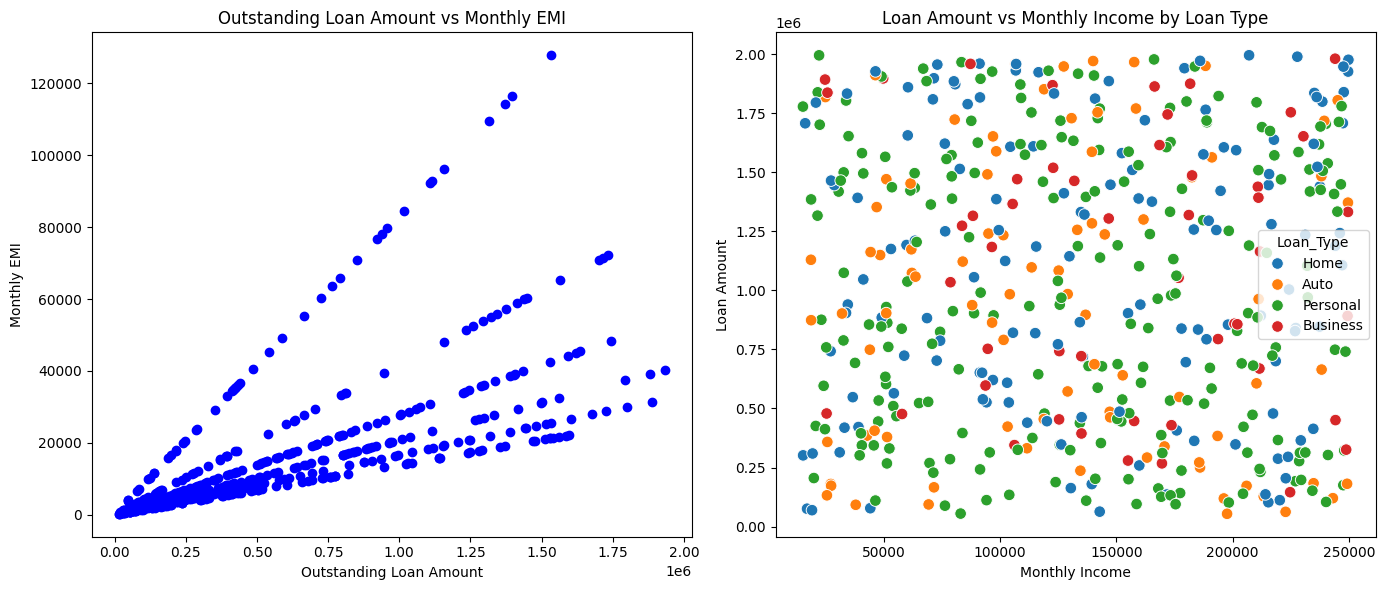

In [338]:
# Create subplots (1 row, 2 columns)
plt.figure(figsize=(14, 6))

# --- Plot 1 ---
plt.subplot(1, 2, 1)
plt.scatter(Loan_Data["Outstanding_Loan_Amount"], Loan_Data["Monthly_EMI"], color="blue")
plt.title("Outstanding Loan Amount vs Monthly EMI")
plt.xlabel("Outstanding Loan Amount")
plt.ylabel("Monthly EMI")

# --- Plot 2 ---
plt.subplot(1, 2, 2)
sns.scatterplot(x="Monthly_Income", y="Loan_Amount", hue="Loan_Type", data=Loan_Data, s=70)
plt.title("Loan Amount vs Monthly Income by Loan Type")
plt.xlabel("Monthly Income")
plt.ylabel("Loan Amount")

# Show plots
plt.tight_layout()
plt.show()


### **Conclusion for the Two Scatter Plots**

1. **Outstanding Loan Amount vs Monthly EMI**
   There is a **positive correlation** between outstanding loan amount and monthly EMI, indicating that **higher loan amounts lead to higher EMIs**.
   A few points are scattered far apart, showing the presence of **high-value loans with very high EMIs**.

2. **Loan Amount vs Monthly Income by Loan Type**
   Loan amounts are **spread across all income ranges**, with no clear clustering.
   Different loan types (Home, Auto, Personal, Business) are **evenly distributed**, suggesting that **income is not the sole factor influencing loan type selection**.


In [339]:
# Correlation matrix
numeric_data.corr()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
Age,1.000000,0.015005,0.005962,-0.012346,-0.081484,0.079375,-0.047526,0.036566,0.071853,-0.037805,0.048016,0.028419
Monthly_Income,0.015005,1.000000,0.097276,0.002110,0.092388,0.081852,0.025040,0.029607,-0.027688,0.039656,0.016928,0.042408
Num_Dependents,0.005962,0.097276,1.000000,-0.040438,-0.006212,0.051468,0.010134,-0.034971,-0.027397,0.085348,0.065222,-0.019939
Loan_Amount,-0.012346,0.002110,-0.040438,1.000000,0.000131,-0.088530,0.500603,0.751261,0.513592,-0.004125,0.004360,0.009199
Loan_Tenure,-0.081484,0.092388,-0.006212,0.000131,1.000000,-0.002032,-0.023532,0.004416,-0.494992,-0.021841,0.028505,-0.016437
Interest_Rate,0.079375,0.081852,0.051468,-0.088530,-0.002032,1.000000,0.012073,-0.052589,-0.069612,-0.042725,0.038524,-0.030032
Collateral_Value,-0.047526,0.025040,0.010134,0.500603,-0.023532,0.012073,1.000000,0.369952,0.264826,0.046915,-0.008893,-0.058284
Outstanding_Loan_Amount,0.036566,0.029607,-0.034971,0.751261,0.004416,-0.052589,0.369952,1.000000,0.689876,0.051649,0.041214,-0.010322
Monthly_EMI,0.071853,-0.027688,-0.027397,0.513592,-0.494992,-0.069612,0.264826,0.689876,1.000000,0.027846,0.037874,0.030343
Num_Missed_Payments,-0.037805,0.039656,0.085348,-0.004125,-0.021841,-0.042725,0.046915,0.051649,0.027846,1.000000,0.343797,0.033484


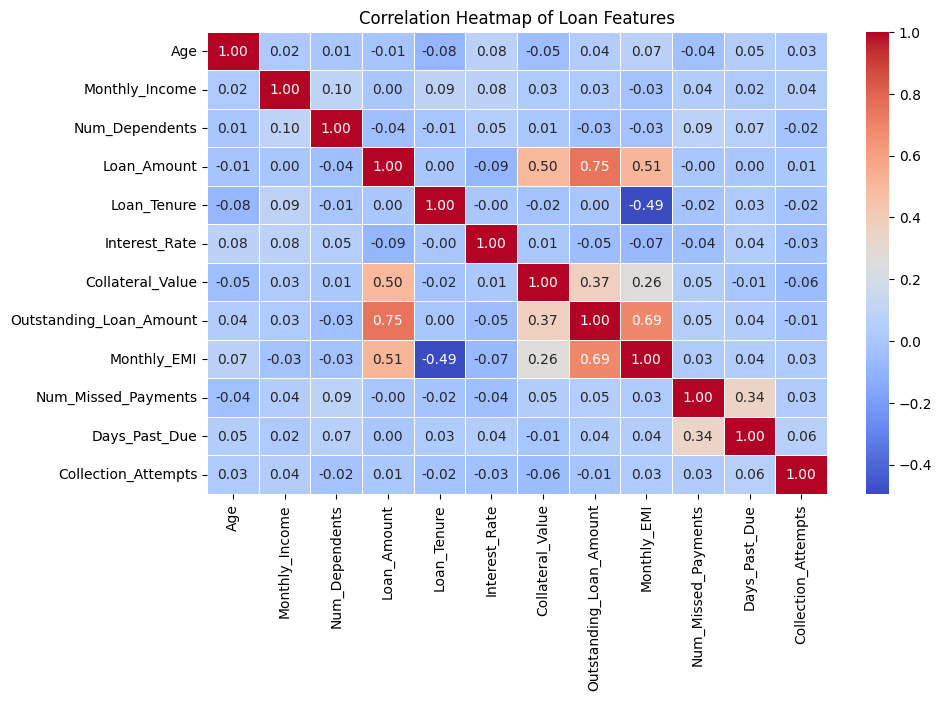

In [340]:
# Select numeric columns
numeric_data = Loan_Data.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(
    data=corr_matrix, annot=True,fmt=".2f", cmap="coolwarm",linewidths=0.5)
plt.title("Correlation Heatmap of Loan Features")
plt.show()

Conclusion from Correlation Heatmap
* **Strong Positive Correlations**

* **Loan Amount & Outstanding Loan Amount (0.75)**:Higher loan amounts are strongly associated with higher outstanding balances.

* **Outstanding Loan Amount & Monthly EMI (0.69)**:Larger outstanding loans result in higher monthly EMIs.

* **Collateral Value & Loan Amount (0.50)**:Loans with higher amounts tend to have higher collateral values.

In [341]:
Loan_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

In [342]:
Loan_Data.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


# Quality of the data

In [343]:
Loan_Data

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1727997.258,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1180032.362,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2622539.931,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No
3,BRW_4,63,Female,Salaried,140818,2,LN_4,1811663,36,12.23,...,1145492.680,2.249739e+05,6249.28,On-Time,1,56,Fully Recovered,2,Calls,No
4,BRW_5,28,Male,Salaried,76272,1,LN_5,88578,48,16.13,...,0.000,3.918989e+04,816.46,On-Time,1,69,Fully Recovered,0,Debt Collectors,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,BRW_496,46,Female,Salaried,248483,1,LN_496,740796,72,16.59,...,0.000,4.135285e+05,5743.45,Delayed,2,169,Fully Recovered,2,Settlement Offer,No
496,BRW_497,30,Female,Salaried,243590,3,LN_497,1408126,60,11.03,...,0.000,3.173740e+05,5289.57,Delayed,2,102,Partially Recovered,9,Settlement Offer,No
497,BRW_498,46,Female,Salaried,113864,2,LN_498,375203,48,9.16,...,0.000,3.300302e+05,6875.63,Delayed,3,140,Fully Recovered,3,Settlement Offer,No
498,BRW_499,54,Male,Salaried,158401,2,LN_499,1769890,24,11.19,...,1272774.031,1.565339e+06,65222.46,On-Time,3,9,Partially Recovered,9,Calls,No


In [344]:
print(Loan_Data.columns)

Index(['Borrower_ID', 'Age', 'Gender', 'Employment_Type', 'Monthly_Income',
       'Num_Dependents', 'Loan_ID', 'Loan_Amount', 'Loan_Tenure',
       'Interest_Rate', 'Loan_Type', 'Collateral_Value',
       'Outstanding_Loan_Amount', 'Monthly_EMI', 'Payment_History',
       'Num_Missed_Payments', 'Days_Past_Due', 'Recovery_Status',
       'Collection_Attempts', 'Collection_Method', 'Legal_Action_Taken'],
      dtype='object')


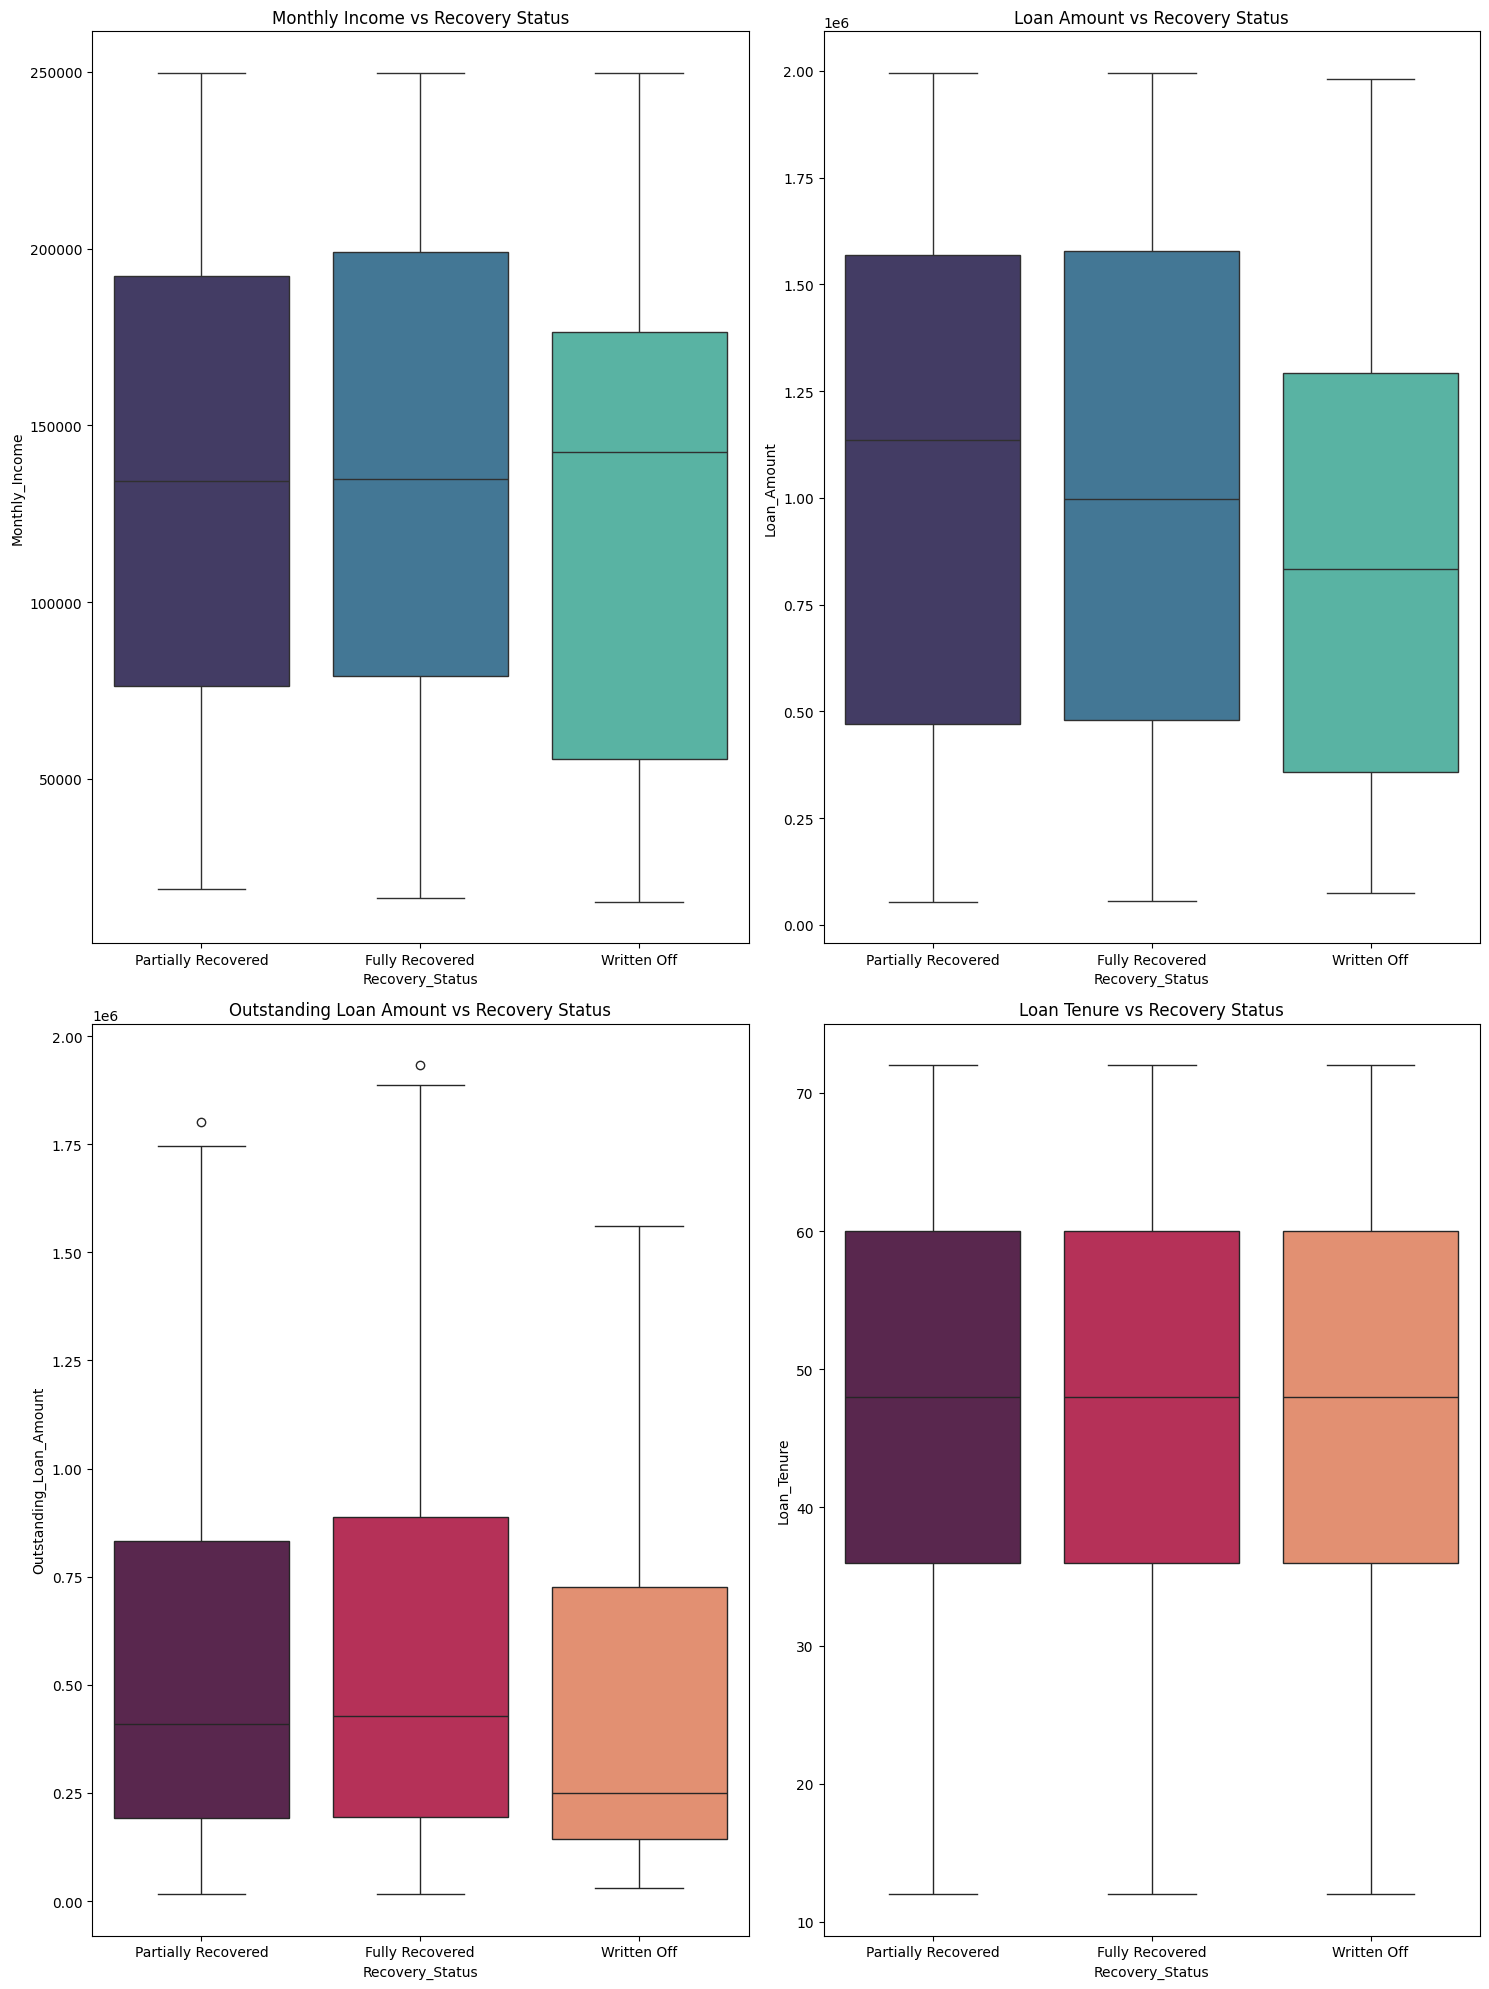

In [345]:
plt.figure(figsize=(15,20))

# 1
plt.subplot(2,2,1)
sns.boxplot(
    x="Recovery_Status", 
    y="Monthly_Income", 
    data=Loan_Data, 
    hue="Recovery_Status",
    palette="mako",
    legend=False
)
plt.title("Monthly Income vs Recovery Status")
plt.legend([],[], frameon=False)

# 2
plt.subplot(2,2,2)
sns.boxplot(
    x="Recovery_Status", 
    y="Loan_Amount", 
    data=Loan_Data, 
    hue="Recovery_Status",
    palette="mako",
    legend=False
)
plt.title("Loan Amount vs Recovery Status")
plt.legend([],[], frameon=False)

# 3
plt.subplot(2,2,3)
sns.boxplot(
    x="Recovery_Status", 
    y="Outstanding_Loan_Amount", 
    data=Loan_Data, 
    hue="Recovery_Status",
    palette="rocket",
    legend=False
)
plt.title("Outstanding Loan Amount vs Recovery Status")
plt.legend([],[], frameon=False)

# 4
plt.subplot(2,2,4)
sns.boxplot(
    x="Recovery_Status", 
    y="Loan_Tenure", 
    data=Loan_Data, 
    hue="Recovery_Status",
    palette="rocket",
    legend=False
)
plt.title("Loan Tenure vs Recovery Status")
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


# Split data into training and testing sets

In [346]:
Loan_Data['Recovery_Status'].unique()

array(['Partially Recovered', 'Fully Recovered', 'Written Off'],
      dtype=object)

In [347]:
# Create binary target column
Loan_Data["Recovered"] = Loan_Data["Recovery_Status"].map({
    "Fully Recovered": 1,
    "Partially Recovered": 0,
    "Written Off": 0
})

print(Loan_Data["Recovered"].value_counts())


Recovered
1    296
0    204
Name: count, dtype: int64


In [348]:
# Separate features and target
X = Loan_Data.drop(["Recovery_Status", "Recovered"], axis=1) # Features
y = Loan_Data["Recovered"]                                   # Target (Yes/No)a

In [349]:
# Check
print("Features (x):")
print(X.head())
print("\nTarget (y):")
print(y.head())

Features (x):
  Borrower_ID  Age  Gender Employment_Type  Monthly_Income  Num_Dependents  \
0       BRW_1   59    Male        Salaried          215422               0   
1       BRW_2   49  Female        Salaried           60893               0   
2       BRW_3   35    Male        Salaried          116520               1   
3       BRW_4   63  Female        Salaried          140818               2   
4       BRW_5   28    Male        Salaried           76272               1   

  Loan_ID  Loan_Amount  Loan_Tenure  Interest_Rate Loan_Type  \
0    LN_1      1445796           60          12.39      Home   
1    LN_2      1044620           12          13.47      Auto   
2    LN_3      1923410           72           7.74      Home   
3    LN_4      1811663           36          12.23      Home   
4    LN_5        88578           48          16.13  Personal   

   Collateral_Value  Outstanding_Loan_Amount  Monthly_EMI Payment_History  \
0       1727997.258             2.914130e+05      4856.

In [350]:
from sklearn.preprocessing import LabelEncoder
import joblib

le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 'No'->0, 'Yes'->1
joblib.dump(le, "target_encoder.pkl")


['target_encoder.pkl']

# Split the data

In [351]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [352]:
# 3. Identify column types
numeric_cols = X.select_dtypes(include='number').columns
categorical_cols = X.select_dtypes(include='object').columns


# Preprocessing Pipeline

In [353]:
preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]), numeric_cols),

    ("cat", Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown="ignore"))
    ]), categorical_cols)
])

In [354]:
#Check first 5 rows of training features
print(X_train.head())

    Borrower_ID  Age  Gender Employment_Type  Monthly_Income  Num_Dependents  \
249     BRW_250   62    Male        Salaried           22151               0   
433     BRW_434   49  Female        Salaried           61479               1   
19       BRW_20   64  Female   Self-Employed           48397               1   
322     BRW_323   49    Male        Salaried          103920               3   
332     BRW_333   41    Male   Self-Employed          240952               3   

    Loan_ID  Loan_Amount  Loan_Tenure  Interest_Rate Loan_Type  \
249  LN_250      1995049           36           8.96  Personal   
433  LN_434      1452549           72          15.92      Auto   
19    LN_20      1149577           12          12.76      Auto   
322  LN_323       134381           24          16.84  Personal   
332  LN_333       303091           36          15.44  Personal   

     Collateral_Value  Outstanding_Loan_Amount  Monthly_EMI Payment_History  \
249             0.000             1.529768e

In [355]:
# Check first 5 rows of test features
print(X_test.head())

    Borrower_ID  Age  Gender Employment_Type  Monthly_Income  Num_Dependents  \
361     BRW_362   55  Female        Salaried          141888               0   
73       BRW_74   28    Male        Salaried           79178               3   
374     BRW_375   35  Female   Self-Employed          237374               0   
155     BRW_156   22  Female   Self-Employed          133516               3   
104     BRW_105   61  Female        Salaried          150542               2   

    Loan_ID  Loan_Amount  Loan_Tenure  Interest_Rate Loan_Type  \
361  LN_362      1753834           72          17.81      Auto   
73    LN_74      1482769           72           6.39  Personal   
374  LN_375       846710           36          12.84      Home   
155  LN_156      1917306           24           7.66  Personal   
104  LN_105      1190844           12          15.14  Personal   

     Collateral_Value  Outstanding_Loan_Amount  Monthly_EMI Payment_History  \
361       1601438.800             1.475467e

# Logistic Regression

In [356]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Logistic Regression pipeline
log_reg_clf = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])

# Train the model
log_reg_clf.fit(X_train, y_train)

# Predict
y_pred_log = log_reg_clf.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


Accuracy: 0.79

Confusion Matrix:
 [[31 13]
 [ 8 48]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.70      0.75        44
           1       0.79      0.86      0.82        56

    accuracy                           0.79       100
   macro avg       0.79      0.78      0.78       100
weighted avg       0.79      0.79      0.79       100



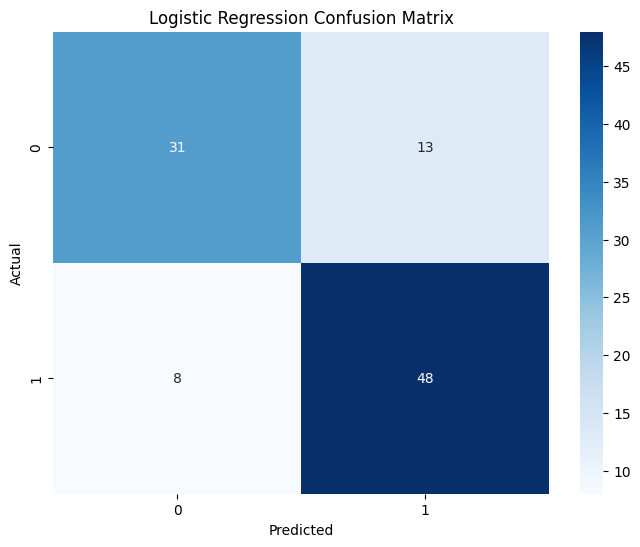

In [357]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_log )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Decision Tree Classifier

In [358]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Decision Tree pipeline
dt_clf = Pipeline([
    ("preprocess", preprocessor), ("model", DecisionTreeClassifier (criterion='gini', max_depth=5, min_samples_split=10,random_state=42
    ))
])

# Train model
dt_clf.fit(X_train, y_train)

# Predict
y_pred_dt = dt_clf.predict(X_test)

# Accuracy
print("Training Accuracy:", dt_clf.score(X_train, y_train) * 100, "%")
print("Testing Accuracy:", dt_clf.score(X_test, y_test) * 100, "%")

# Confusion Matrix & Report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, zero_division=0))


Training Accuracy: 87.25 %
Testing Accuracy: 88.0 %

Confusion Matrix:
 [[32 12]
 [ 0 56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        44
           1       0.82      1.00      0.90        56

    accuracy                           0.88       100
   macro avg       0.91      0.86      0.87       100
weighted avg       0.90      0.88      0.88       100



# Support Vector Classifier

In [359]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# Create the SVM pipeline
svc_clf = Pipeline([
    ("preprocess", preprocessor), ("model", SVC(kernel='rbf', probability=True, random_state=42))
])

# Train the model
svc_clf.fit(X_train, y_train)

# Predict
y_pred_svc = svc_clf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred_svc))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Accuracy: 0.83

Confusion Matrix:
 [[27 17]
 [ 0 56]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.61      0.76        44
           1       0.77      1.00      0.87        56

    accuracy                           0.83       100
   macro avg       0.88      0.81      0.81       100
weighted avg       0.87      0.83      0.82       100



# XGBoost Classifier

In [360]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline

xgb_clf = Pipeline([
    ("preprocess", preprocessor),
    ("model", XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss",   # IMPORTANT
        random_state=42,
        tree_method="hist"       # Faster + best for CPU
    ))
])
xgb_clf.fit(X_train, y_train)
# Predict
y_pred_xgb = xgb_clf.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.94      0.68      0.79        44
           1       0.79      0.96      0.87        56

    accuracy                           0.84       100
   macro avg       0.87      0.82      0.83       100
weighted avg       0.86      0.84      0.84       100

[[30 14]
 [ 2 54]]


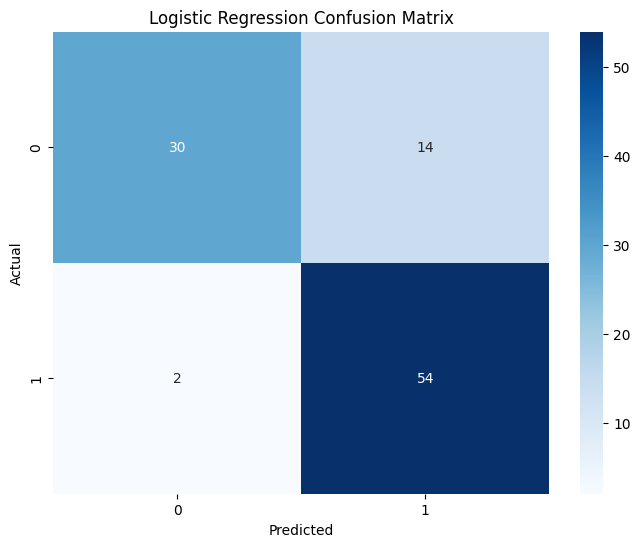

In [361]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb )
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# LightGBM

In [362]:
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

pipeline = Pipeline([
    ("preprocess", preprocessor),
    ("model", LGBMClassifier(verbose=-1, random_state=42))
])
from sklearn.metrics import accuracy_score, classification_report
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.82

Confusion Matrix:
 [[29 15]
 [ 3 53]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76        44
           1       0.78      0.95      0.85        56

    accuracy                           0.82       100
   macro avg       0.84      0.80      0.81       100
weighted avg       0.84      0.82      0.81       100



C:\Users\TEJAL KATALKAR\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


# Dictionary to store models

In [363]:
# Dictionary to store models
models = {
    "LogisticRegression": Pipeline([
        ("preprocess", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]),

    "DecisionTree": Pipeline([
        ("preprocess", preprocessor),
        ("model", DecisionTreeClassifier(
            criterion='gini',
            max_depth=5,
            min_samples_split=10,
            random_state=42
        ))
    ]),
    
    "SVC": Pipeline([
        ("preprocess", preprocessor),
        ("model", SVC(kernel='rbf', probability=True, random_state=42))
    ]),

    "XGBoost": Pipeline([
        ("preprocess", preprocessor),
        ("model", XGBClassifier(
            n_estimators=300,
            learning_rate=0.05,
            max_depth=5,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        ))
    ]),

    "LightGBM": Pipeline([
        ("preprocess", preprocessor),
        ("model", LGBMClassifier(verbose=-1, random_state=42))
    ])
}

# Train all models
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")


LogisticRegression trained successfully.
DecisionTree trained successfully.
SVC trained successfully.
XGBoost trained successfully.
LightGBM trained successfully.


In [364]:
joblib.dump(models, "all_models.pkl")
print("All models saved successfully!")


All models saved successfully!


In [365]:
# Load models
loaded_models = joblib.load("all_models.pkl")

# Predict using Decision Tree
y_pred_dt = loaded_models["DecisionTree"].predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt) * 100, "%")

Decision Tree Accuracy: 88.0 %
